In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.read_csv("./train.csv")
for x in df.columns:
    df[x] = pd.to_numeric(df[x])

train_cols = [x for x in df.columns if x != 'metric']
train = df[train_cols]
test = df['metric']
del train['Unnamed: 0']

train.tail(20)

,hour,day,week,sqm,latitude,longitude,year
157723,19,11,6,400,44.573752,10.984388,2018
157724,20,11,6,400,44.573752,10.984388,2018
157725,21,11,6,400,44.573752,10.984388,2018
157726,22,11,6,400,44.573752,10.984388,2018
157727,23,11,6,400,44.573752,10.984388,2018
157728,0,12,7,400,44.573752,10.984388,2018
157729,1,12,7,400,44.573752,10.984388,2018
157730,2,12,7,400,44.573752,10.984388,2018
157731,3,12,7,400,44.573752,10.984388,2018
157732,4,12,7,400,44.573752,10.984388,2018


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

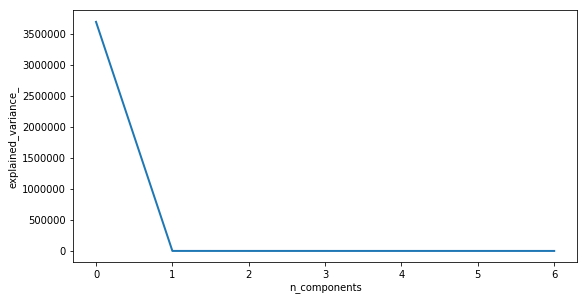

In [2]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
lr = linear_model.LinearRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('poly', poly), ('linear', lr)])

X_digits = train
y_digits = test
pca.fit(X_digits)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

poly_degrees = [1, 2, 3, 4]
estimator = GridSearchCV(pipe, dict(poly__degree = poly_degrees ))
estimator.fit(X_digits, y_digits)
estimator

In [3]:
estimator.cv_results_

/home/ubuntu/test/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ubuntu/test/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ubuntu/test/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ubuntu/test/lib/python3.5/site-packages/sk

{'mean_fit_time': array([0.05174987, 0.25239031, 1.62495057, 3.99226348]),
 'mean_score_time': array([0.00771077, 0.02600988, 0.09629925, 0.31152058]),
 'mean_test_score': array([-9.38699699e-01, -3.31937478e+00, -2.09558088e+05, -1.19619484e+11]),
 'mean_train_score': array([0.44704292, 0.68323393, 0.82640659, 0.86803208]),
 'param_poly__degree': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'poly__degree': 1},
  {'poly__degree': 2},
  {'poly__degree': 3},
  {'poly__degree': 4}],
 'rank_test_score': array([1, 2, 3, 4], dtype=int32),
 'split0_test_score': array([-2.11086850e+00, -9.30928079e+00, -1.17437294e+05, -3.71663361e+09]),
 'split0_train_score': array([0.41497814, 0.68954119, 0.84430296, 0.8855886 ]),
 'split1_test_score': array([-8.32493431e-01, -8.46203406e-01, -2.37891818e+05, -2.92264752e+11]),
 'split1_train_score': array([0.61092096, 0.71575486, 0.88318264, 0.90481799]),
 '

In [5]:
estimator.best_index_ , estimator.best_score_

(0, -0.9386996990162575)